In [114]:
!gdown 1z31sHzBqwGUGiWlw9s3rdRRlor1-upqW

Downloading...
From: https://drive.google.com/uc?id=1z31sHzBqwGUGiWlw9s3rdRRlor1-upqW
To: /content/Crop_2048x2048_Binary.zip
100% 320M/320M [00:03<00:00, 98.4MB/s]


In [ ]:
!unzip /content/Crop_2048x2048_Binary.zip -d /content/binary_dataset

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import shutil
from itertools import product

In [34]:
img_name_list = os.listdir('/content/crop_dataset/images')
name_list = []
for name in img_name_list:
    name_list.append(name.split('.')[0])

## Image crop 함수 
- dataset tree


```
data_folder
ㄴ images
    ㄴ aaa.jpg
    ㄴ bbb.jpg
    ㄴ ccc.jpg
    ㄴ ...
ㄴ masks
    ㄴ aaa.png
    ㄴ bbb.png
    ㄴ ccc.png
    ㄴ ...
```



In [119]:
def image_crop(data_path, save_path, crop_num):

    img_name_list = os.listdir(data_path + '/images')
    
    for names in name_list:
        name = names.split('.')[0]
        origin_img = Image.open(data_path + f'/images/{name}.jpg')
        origin_mask = Image.open(data_path + f'/masks/{name}.png')

        x, y = origin_img.size

        x_crop_size = x / crop_num
        y_crop_size = y / crop_num

        point_num = range(crop_num)
        points = product(point_num, point_num)
        
        num = 1
        for a, b in points:
            crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            crop_mask = origin_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            
            crop_img.save(save_path + f'/images/{name}_{num:03d}.jpg')
            crop_mask.save(save_path + f'/masks/{name}_{num:03d}.png')

            num += 1

In [121]:
!mkdir /content/crop_size_512x512_16_binary_dataset
!mkdir /content/crop_size_512x512_16_binary_dataset/images
!mkdir /content/crop_size_512x512_16_binary_dataset/masks

In [124]:
origin_data_path = '/content/binary_dataset/crop_dataset'
save_data_path = '/content/crop_size_512x512_16_binary_dataset'

image_crop(origin_data_path, save_data_path, 4)

In [ ]:
!zip -r crop_size_512x512_16_binary_dataset.zip ./crop_size_512x512_16_binary_dataset

## Make mask exist dataset

In [134]:
!mkdir /content/crop_size_512x512_16_mask_exist_binary
!mkdir /content/crop_size_512x512_16_mask_exist_binary/images
!mkdir /content/crop_size_512x512_16_mask_exist_binary/masks

In [135]:
data_path = '/content/crop_size_512x512_16_binary_dataset'
save_path = '/content/crop_size_512x512_16_mask_exist_binary'

masks_name_list = os.listdir(data_path + '/masks')

mask_list = []
for masks in masks_name_list:
    mask_name = masks.split('.')[0]

    mask_img = Image.open(data_path + f'/masks/{masks}')
    mask_img = np.array(mask_img)

    if mask_img.max() != 0:
        mask_list.append(mask_name)

        shutil.copy(data_path + f'/images/{mask_name}.jpg', save_path + f'/images/{mask_name}.jpg')
        shutil.copy(data_path + f'/masks/{mask_name}.png', save_path + f'/masks/{mask_name}.png')

In [ ]:
!zip -r crop_size_512x512_16_mask_exist_binary.zip ./crop_size_512x512_16_mask_exist_binary

## data check

In [103]:
print(len(masks_name_list))
print(len(mask_list))

5616
3112


In [137]:
a = os.listdir('/content/crop_size_512x512_16_mask_exist_binary/images')
b = os.listdir('/content/crop_size_512x512_16_mask_exist_binary/masks')
print(len(a), len(b))

3112 3112


1


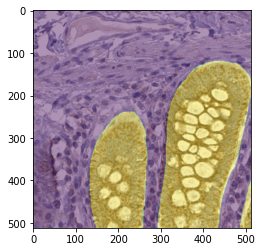

In [139]:
num = 100

test_img = Image.open(save_path + '/images/' + mask_list[num] + '.jpg')
test_mask = Image.open(save_path + '/masks/' + mask_list[num] + '.png')

test_img = np.array(test_img)
test_mask = np.array(test_mask)

print(test_mask.max())

plt.imshow(test_img)
plt.imshow(test_mask * 255, alpha = 0.4)
plt.show()


## test

In [ ]:
crop_num = 4

img_name_list = os.listdir('/content/crop_dataset/images')
name_list = []

for name in img_name_list:
    name_list.append(name.split('.')[0])

for name in name_list:
    origin_img = Image.open(f'/content/crop_dataset/images/{name}.jpg')
    origin_mask = Image.open(f'/content/crop_dataset/masks/{name}.png')

    x, y = origin_img.size

    x_crop_size = x / crop_num
    y_crop_size = y / crop_num
    
    
    num = 1
    for a in range(crop_num):
        for b in range(crop_num):
            aa = x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)
            bb = x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)

            print(num, aa, bb)

            num += 1




In [51]:
crop_size = 512
crop_num = 4

for a in range(crop_num):
    for b in range(crop_num):
        print(crop_size * a, crop_size * b, '//', crop_size * (a + 1), crop_size * (b + 1))
        print(crop_size * a, crop_size * b, '//', crop_size * (a + 1), crop_size * (b + 1))



0 0 // 512 512
0 512 // 512 1024
0 1024 // 512 1536
0 1536 // 512 2048
512 0 // 1024 512
512 512 // 1024 1024
512 1024 // 1024 1536
512 1536 // 1024 2048
1024 0 // 1536 512
1024 512 // 1536 1024
1024 1024 // 1536 1536
1024 1536 // 1536 2048
1536 0 // 2048 512
1536 512 // 2048 1024
1536 1024 // 2048 1536
1536 1536 // 2048 2048


In [ ]:
(0, 0), (512, 512)
(0, 512), (512, 1024)
(0, 1024), (512, 1536)
(0, 1536), (512, 2048)



In [ ]:
# for a in name_list:
#     test_img = cv2.imread(f'/content/crop_dataset/images/{a}.jpg')
#     test_mask = cv2.imread(f'/content/crop_dataset/masks/{a}.png')
    
#     plt.imshow(test_img)
#     plt.imshow(test_mask * 255, alpha=0.4)
#     plt.show()

In [35]:
def image_crop(data_path, save_path, crop_num):

    img_name_list = os.listdir(data_path + '/images')
    
    for idx, names in enumerate(img_name_list):
        if idx == 1:
            break
        name = names.split('.')[0]
        origin_img = Image.open('/content/binary_dataset/crop_dataset/images/10044.jpg')
        # origin_mask = Image.open(data_path + f'/masks/{name}.png')

        x, y = origin_img.size

        x_crop_size = x / crop_num
        y_crop_size = y / crop_num

        point_num = range(crop_num)
        points = product(point_num, point_num)
        
        num = 1
        for a, b in points:
            crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            # crop_mask = origin_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            
            # crop_img.save(save_path + f'/images/{name}_{num:03d}.jpg')
            # crop_mask.save(save_path + f'/masks/{name}_{num:03d}.png')

            plt.imshow(crop_img)
            plt.show()

            num += 1

In [ ]:
origin_data_path = '/content/binary_dataset/crop_dataset'
save_data_path = '/content/crop_size_512x512_16_binary_dataset'

image_crop(origin_data_path, save_data_path, 4)

In [ ]:
crop_num = 4

origin_img = Image.open('/content/binary_dataset/crop_dataset/images/10044.jpg')

x, y = origin_img.size

x_crop_size = x / crop_num
y_crop_size = y / crop_num

point_num = range(crop_num)
points = product(point_num, point_num)

for a, b in points:
    crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))

    plt.imshow(crop_img)
    plt.show()


In [ ]:
crop_num = 4

origin_img = Image.open('/content/binary_dataset/crop_dataset/images/10044.jpg')

x, y = origin_img.size

x_crop_size = x / crop_num
y_crop_size = y / crop_num

point_num = range(crop_num)
points = product(point_num, point_num)

for a, b in points:
    crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
    
    plt.imshow(crop_img)
    plt.show()
    


In [60]:
size = 512

img_crop=Image.open('/content/binary_dataset/crop_dataset/images/10044.jpg')

points = product(range(0,4),range(0,4))
for x ,y in points: 
    min_x = x*size
    max_x = (x+1)*size
    min_y = y*size
    max_y = (y+1)*size

    area=(min_x,min_y,max_x,max_y)
    img_crop2=img_crop.crop(area)

    img_crop3=np.array(img_crop2)

    print(img_crop3)



[[[244 244 244]
  [245 245 245]
  [246 246 246]
  ...
  [120 114 140]
  [143 134 165]
  [148 138 172]]

 [[245 245 245]
  [245 245 245]
  [244 244 244]
  ...
  [128 118 142]
  [125 112 140]
  [121 108 138]]

 [[245 245 245]
  [244 244 244]
  [243 243 243]
  ...
  [191 177 194]
  [171 154 173]
  [149 131 153]]

 ...

 [[243 221 233]
  [203 182 191]
  [178 157 166]
  ...
  [182 166 167]
  [166 150 151]
  [187 171 172]]

 [[231 208 218]
  [215 192 200]
  [197 176 183]
  ...
  [187 171 174]
  [155 139 142]
  [146 130 133]]

 [[215 192 200]
  [217 194 202]
  [203 180 186]
  ...
  [203 187 190]
  [156 140 143]
  [118 102 105]]]
[[[204 193 209]
  [202 191 207]
  [211 200 216]
  ...
  [246 237 240]
  [203 197 199]
  [123 119 120]]

 [[198 187 203]
  [227 216 232]
  [232 221 237]
  ...
  [247 238 241]
  [223 217 219]
  [195 191 192]]

 [[186 175 192]
  [226 215 232]
  [233 222 239]
  ...
  [253 244 247]
  [247 241 243]
  [214 208 210]]

 ...

 [[181 171 198]
  [205 195 222]
  [206 196 223]
  ..